# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df=pd.merge(mouse_metadata,study_results)

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df[df.duplicated(subset=['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
filtered_df = df[df['Mouse ID'] == 'g989']
filtered_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df=df.drop_duplicates()
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(df['Mouse ID'].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
median=df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).median()
mean= df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).mean()
standard_deviation= df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).std()
variance= df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).var()
sem= df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
index=['mean','median','variance','standard_deviation','sem']
summary_df = pd.concat([mean,median, variance, standard_deviation, sem], axis=1)
summary_df.columns=index
summary_df

,mean,median,variance,standard_deviation,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

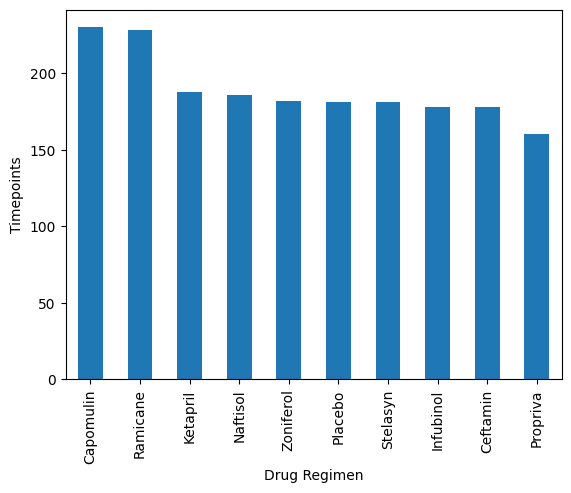

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df['Drug Regimen'].value_counts().plot(kind='bar')
plt.ylabel('Timepoints')
plt.show()

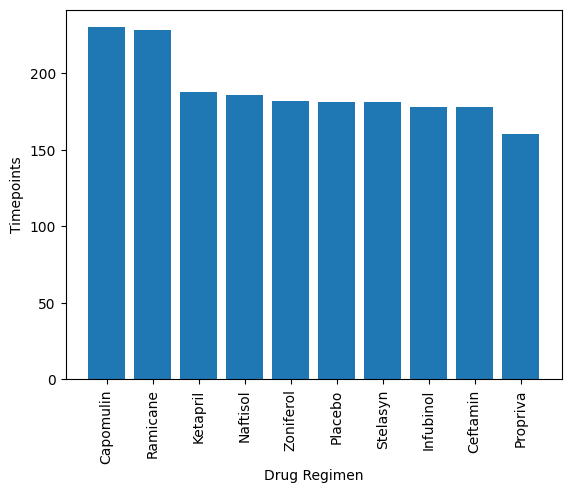

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(df['Drug Regimen'].value_counts().index.values,df['Drug Regimen'].value_counts().values)
plt.xticks(rotation=90)
plt.ylabel('Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

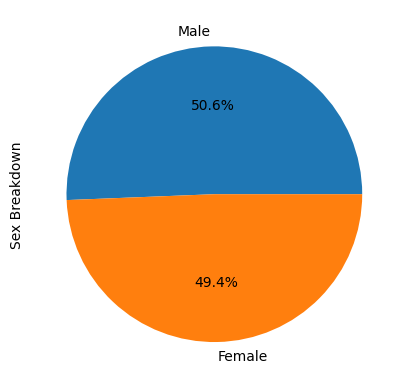

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('Sex Breakdown')
plt.show()

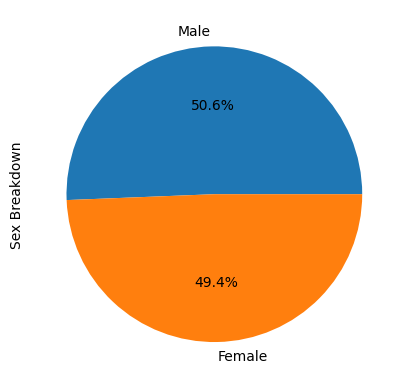

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df['Sex'].value_counts(),labels=df['Sex'].value_counts().index.values,autopct='%1.1f%%')
plt.ylabel('Sex Breakdown')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_df=df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df=pd.merge(max_df,df)
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    r=merged_df[merged_df['Drug Regimen']==treatment]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    f=r['Tumor Volume (mm3)']
    vol=f.to_list()
    # add subset 
    tumor_vol.append(vol)
    
    # Determine outliers using upper and lower bounds
    q=r['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lq=q[.25]
    hq=q[.75]
    iqr=hq-lq
    lb=lq-1.5*iqr
    ub=hq+1.5*iqr
    outlier=f[(f < lb) | (f > ub)]
    print(f'{treatment} outliers:{outlier}')

Capomulin outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


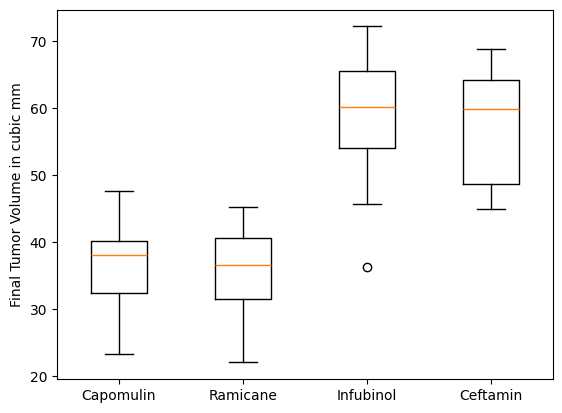

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol,labels=treatments)
plt.ylabel('Final Tumor Volume in cubic mm')
plt.show()

## Line and Scatter Plots

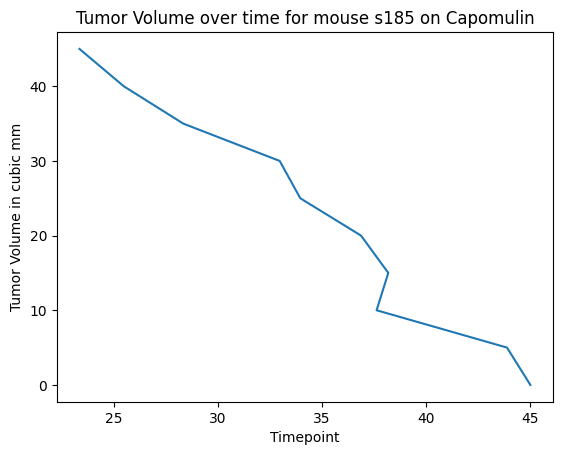

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
s185=df[df['Mouse ID']=='s185']
plt.plot(s185['Tumor Volume (mm3)'],s185['Timepoint'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume in cubic mm')
plt.title('Tumor Volume over time for mouse s185 on Capomulin')
plt.show()


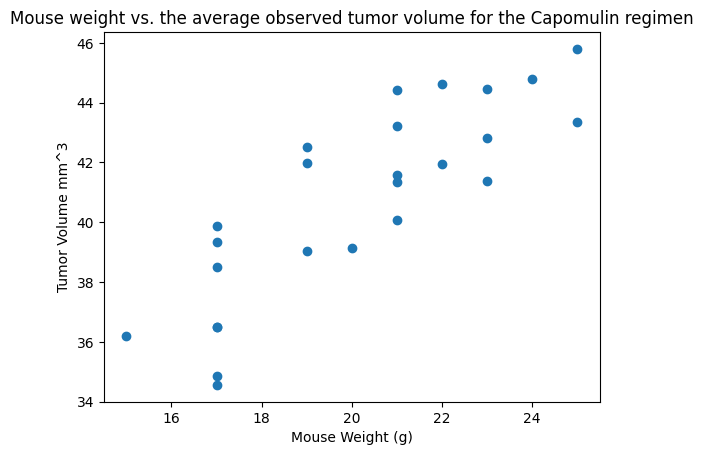

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin=df[df['Drug Regimen']=='Capomulin']
scatter_data=Capomulin.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(scatter_data['Weight (g)'],scatter_data['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume mm^3')
plt.title('Mouse weight vs. the average observed tumor volume for the Capomulin regimen')
plt.show()

## Correlation and Regression

We find a strong positive correlation of 0.841936342469472 with respect to mouse weight and tumor volume.


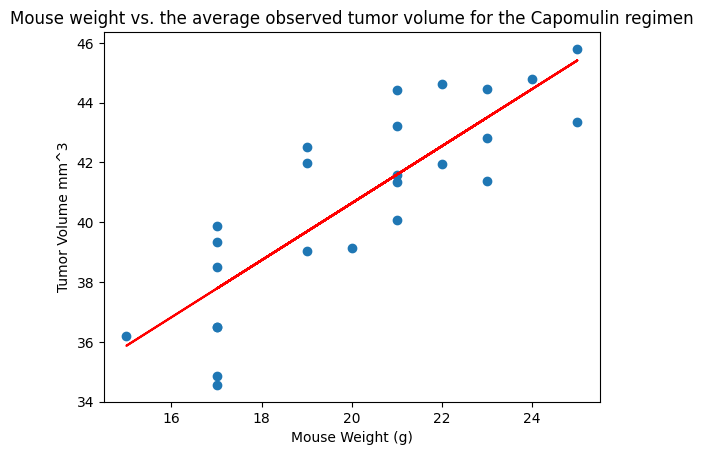

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=st.pearsonr(scatter_data['Weight (g)'],scatter_data['Tumor Volume (mm3)'])
regression=st.linregress(scatter_data['Weight (g)'],scatter_data['Tumor Volume (mm3)'])
plt.scatter(scatter_data['Weight (g)'],scatter_data['Tumor Volume (mm3)'])
x=scatter_data['Weight (g)']
y=regression[0]*x+regression[1]
plt.plot(x,y,color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume mm^3')
plt.title('Mouse weight vs. the average observed tumor volume for the Capomulin regimen')
print(f'We find a strong positive correlation of {correlation[0]} with respect to mouse weight and tumor volume.')
plt.show()
regression